In [81]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import SGD
import matplotlib.pyplot as plt

In [82]:
x = torch.tensor([[4,6,2,-1,6,2,5],[1,6,2,-6,5,-3,5]])
x

tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])

In [83]:
#here relu optimizer converts all the negative values to 0 and positive value to the value itself
R = nn.ReLU()
R(x)

tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])

In [84]:
x = torch.linspace(-3,3,100)
y = R(x)

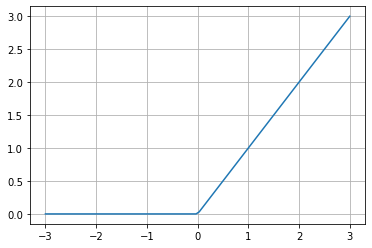

In [85]:
#plotting x,y graph
plt.plot(x.numpy(), y.numpy())
#plt.plot(x,y)
plt.grid()
plt.show()

In [86]:
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.matrix1 = nn.Linear(2,8,bias = False)
        self.matrix2 = nn.Linear(8,1,bias = False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.matrix1(x))
        x = self.matrix2(x)
        return x.squeeze()

In [87]:
def train_model(x,y,f, n_epochs=50):
    opt = SGD(f.parameters(), lr=0.001)
    L = nn.MSELoss()
    
    
    #Train model
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad() # flush previous epoch's gradient
        loss_value = L(f(x), y) #compute loss
        loss_value.backward() #compute gradient
        opt.step() #perform iteration using gradiet above
        losses.append(loss_value.item())
    return f,losses

In [88]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f2 = MyNeuralNet2()

#Train model
f2, losses2 = train_model(x,y,f2, n_epochs=5000)

In [89]:
y

tensor([1., 5., 2., 5.])

In [90]:
f2(x)

tensor([2.4197, 3.0634, 1.8907, 5.2375], grad_fn=<SqueezeBackward0>)

In [91]:
f2

MyNeuralNet2(
  (matrix1): Linear(in_features=2, out_features=8, bias=False)
  (matrix2): Linear(in_features=8, out_features=1, bias=False)
  (R): ReLU()
)

In [92]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80, bias=False)
        self.Matrix2 = nn.Linear(80,1, bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [94]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3 = MyNeuralNet3()

#train model
f3, losses3 = train_model(x,y,f3, n_epochs=5000)

In [95]:
y

tensor([1., 5., 2., 5.])

In [98]:
f3(x)

tensor([1.9480, 3.5947, 1.9256, 5.1592], grad_fn=<SqueezeBackward0>)

In [101]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward():
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [102]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f4 = MyNeuralNet4()

#train model
f4, losses4 = train_model(x,y,f4, n_epochs=5000)


TypeError: MyNeuralNet4.forward() takes 0 positional arguments but 2 were given